# Mask R-CNN - Inspect Ballon Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%tensorflow_version 1.x

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
TensorFlow 1.x selected.


In [2]:
import sys
sys.path.insert(0,'/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/')


In [3]:
import os
os.chdir('/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/')


In [4]:
# pip install -r requirements.txt
import tensorflow as tf 
print(tf.__version__)

1.15.2


In [ ]:
!pip install keras

In [5]:
from __future__ import division
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from __future__ import division
# Root directory of the project
ROOT_DIR = os.getcwd()
print(os.listdir(ROOT_DIR))
sys.path.append(ROOT_DIR)  # To find local version of the library


['assets', 'images', 'samples', '.gitignore', 'setup.py', 'LICENSE', 'README.md', 'MANIFEST.in', 'setup.cfg', 'logs', 'dataset', 'mask_rcnn_spallcrack_0010.h5', 'mrcnn', 'spallcrack.py', '__pycache__', 'requirements.txt', '.ipynb_checkpoints', 'predicted_image', 'inspect_fashion eval_examples.ipynb']


## Configurations

In [ ]:
# /content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/samples/spallcrack/spallcrack.py

SyntaxError: ignored

In [6]:
# !pip install tensorflow
import spallcrack

Using TensorFlow backend.


In [7]:
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

#from samples.balloon import b

/content/drive/My Drive/Mask_RCNN-master


In [9]:
config = spallcrack.BalloonConfig()
CUSTOM_DIR = os.path.join('spallcrack/')

In [10]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    # Give the configuration a recognizable name
    # Give the configuration a recognizable name
    NAME = "spallcrack"
    BATCH_SIZE = 1
    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1
    # Number of classes (including background)
    NUM_CLASSES = 1 + 2  # Background + bag +top +boots

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 125

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.90

    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 1024

    TRAIN_ROIS_PER_IMAGE = 200

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Notebook Preferences

In [11]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [12]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [13]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [14]:
MODEL_DIR='/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/'

In [15]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [16]:
from tensorflow.python.keras.saving import hdf5_format

In [17]:
/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/logs/spallcrack20200826T0544/mask_rcnn_spallcrack_0022.h5

SyntaxError: ignored

In [18]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
weights_path = "/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/logs/spallcrack20200826T0544/mask_rcnn_spallcrack_0022.h5" #hard coded... sorry

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/logs/spallcrack20200826T0544/mask_rcnn_spallcrack_0022.h5
Re-starting from epoch 22


## Run Detection

In [19]:
/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/spall_crack_train

SyntaxError: ignored

In [20]:

import os
imagelist=[]
for file in os.listdir(ROOT_DIR+'/dataset/spall_crack_train'):
    if file.endswith(".jpg"):
       imagelist.append(file)
       

In [21]:
imagelist

['00001crack_resized.jpg',
 '00002crack_resized.jpg',
 '00002spall_resized.jpg',
 '00001spall_resized.jpg',
 '00005crack_resized.jpg',
 '00004spall_resized.jpg',
 '00003spall_resized.jpg',
 '00003crack_resized.jpg',
 '00004crack_resized.jpg',
 '00005spall_resized.jpg',
 '00006crack_resized.jpg',
 '00006spall_resized.jpg',
 '00007spall_resized.jpg',
 '00007crack_resized.jpg',
 '00010crack_resized.jpg',
 '00008crack_resized.jpg',
 '00008spall_resized.jpg',
 '00009crack_resized.jpg',
 '00009spall_resized.jpg',
 '00010spall_resized.jpg',
 '00011crack_resized.jpg',
 '00012crack_resized.jpg',
 '00012spall_resized.jpg',
 '00011spall_resized.jpg',
 '00013crack_resized.jpg',
 '00014spall_resized.jpg',
 '00015spall_resized.jpg',
 '00014crack_resized.jpg',
 '00013spall_resized.jpg',
 '00015crack_resized.jpg',
 '00016crack_resized.jpg',
 '00016spall_resized.jpg',
 '00017spall_resized.jpg',
 '00017crack_resized.jpg',
 '00018spall_resized.jpg',
 '00020crack_resized.jpg',
 '00019crack_resized.jpg',
 

In [22]:
#img_list = ['image-20.jpg','images.jpg','stuart_weitzman_otk_boots_alljill_1.jpg',
#           'YDE-stuart-weitzman-style-suede-over-the-knee-boots-1024x682.jpg','1-Wall.preview.jpg','Stuart-weitzman-boots-could-i-have-that-4.jpg',
#           '7454-Le-21eme-Adam-Katz-Sinding-After-31-Phillip-Lim-Mercedes-Benz-New-York-Fashion-Week-Spring-Summer-2015_AKS6971-900x599.jpg']
import matplotlib.image as mpimg
# imagelist=['00001crack_resized.jpg','00001spall_resized.jpg','00002crack_resized.jpg','00002spall_resized.jpg','00003crack_resized.jpg','00003spall_resized.jpg','00004crack_resized.jpg','00004spall_resized.jpg','00005crack_resized.jpg','00005spall_resized.jpg','00006crack_resized.jpg','00006spall_resized.jpg','00007crack_resized.jpg','00007spall_resized.jpg','00008crack_resized.jpg','00008spall_resized.jpg','00009crack_resized.jpg','00009spall_resized.jpg','00010crack_resized.jpg','00010spall_resized.jpg']
for i in imagelist:
   # image = mpimg.imread('F:/Mask_RCNN-master/Mask_RCNN-master/samples/catdog/val/'+str(img))
    image = plt.imread('/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/spall_crack_train/'+i)
    # Run object detection
    print(len([image]))
    results = model.detect([image], verbose=1)

    # Display results
    ax = get_ax(1)
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                ['BG', 'spall', 'crack'], r['scores'], ax=ax,
                                title=str(i).split(".")[0])
    

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!rm -r /content/drive/My\ Drive/Mask_RCNN-master/Mask_RCNN-master/predicted_image/

1
Processing 1 images
image                    shape: (224, 224, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
results[0] {'rois': array([[ 35,   0, 169, 207]]), 'class_ids': array([2]), 'scores': array([0.9901084], dtype=float32), 'masks': array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
    

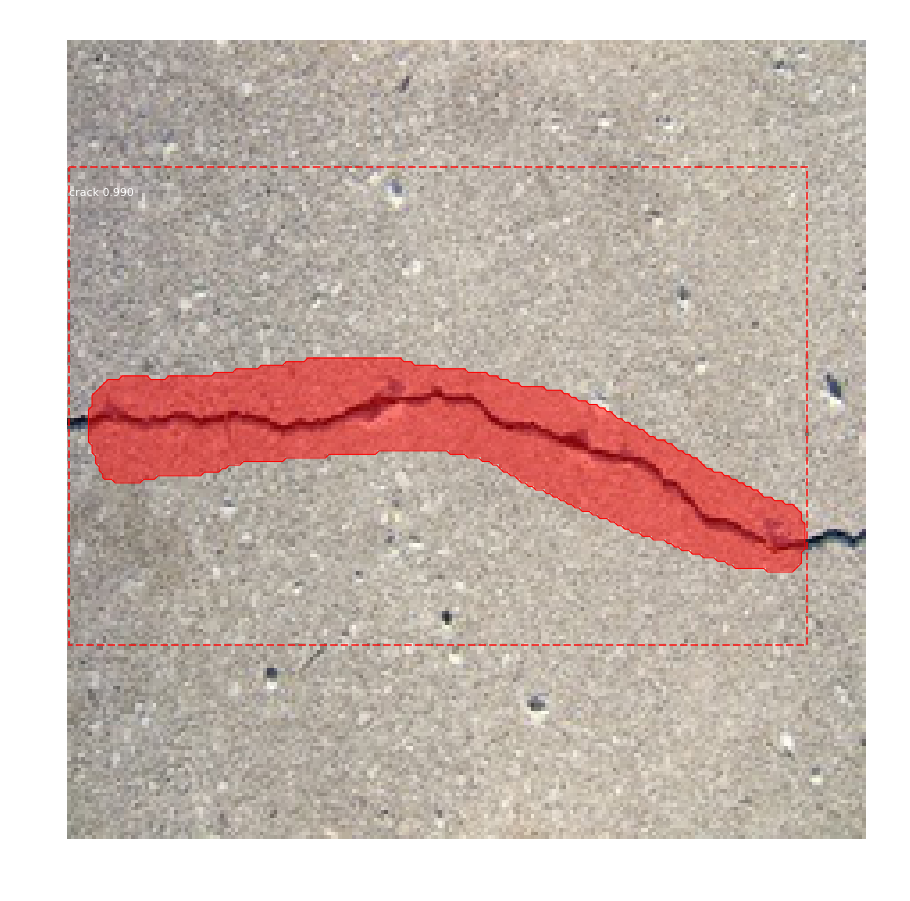

In [ ]:
img_list = ['00006crack_resized.jpg']

import matplotlib.image as mpimg
import cv2

import matplotlib.pyplot as plt
import numpy as np

def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in zip(range(len(figures)), figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.jet())
        #xeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional





def make_segmentation_mask(image, mask,rois):
        img = image.copy()
        img[:,:,0] *= mask
        img[:,:,1] *= mask
        img[:,:,2] *= mask
        #start y end y start x end x [429 501 642 566]
        img[img[:,:,:]== 0] = 255
        cropped = img[rois[0]:rois[2],rois[1]:rois[3]]
        
        #mat_plot_lib_figure
        #plt.imshow(cropped)
        #plt.show()
        return  cropped
        
        
for img in img_list:

    
    image = mpimg.imread('F:/MASKRCNNMULTICLASS/New folder (3)/'+str(img))
    # Run object detection
    print(len([image]))
    results = model.detect([image], verbose=1)
   # print('results',results)
    # Display results
    ax = get_ax(1)
    r = results[0]
    image2 = image.copy()
    print('results[0]',r)
    print(image.shape,r['masks'].shape)
    print(r['masks'].shape[-1])
    
    figures ={}
    for i in range(r['masks'].shape[-1]):
        #print(i)
        mask = r['masks'][:,:,i]
        croped_roi_image = make_segmentation_mask(image, mask,r['rois'][i])
        figures[i] = croped_roi_image
            
                

    # plot of the images in a figure, with 5 rows and 4 columns
    #plot_figures(figures, 1,4)
    #plt.show()
    
    visualize0.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                               ['BG', 'spall', 'crack'], r['scores'], ax=ax,
                              title="")


In [ ]:
from PIL import Image
def crop(image_path, coords, saved_location):
    """
    @param image_path: The path to the image to edit
    @param coords: A tuple of x/y coordinates (x1, y1, x2, y2)
    @param saved_location: Path to save the cropped image
    """
    image_obj = Image.open('F:/MASKRCNNMULTICLASS/crop/download.png')
    cropped_image = image_obj.crop(coords)
    cropped_image.save('F:/MASKRCNNMULTICLASS/crop/crooed.png')
    cropped_image.show()
if __name__ == '__main__':
    image = 'download.png'
    crop(image, ( 0,   0, 224, 172),'F:/MASKRCNNMULTICLASS/crop/')

In [ ]:
from PIL import Image
def crop(image_path, coords, saved_location):
    """
    @param image_path: The path to the image to edit
    @param coords: A tuple of x/y coordinates (x1, y1, x2, y2)
    @param saved_location: Path to save the cropped image
    """
    image_obj = Image.open('F:/MASKRCNNMULTICLASS/New folder (3)/00008crack_resized.jpg')
    cropped_image = image_obj.crop(coords)
    cropped_image.save('F:/MASKRCNNMULTICLASS/crop/crooed.jpg')
    cropped_image.show()
if __name__ == '__main__':
    image = '00008crack_resized.jpg'
    crop(image, (0,   0, 224, 172),'F:/MASKRCNNMULTICLASS/crop/')

1
Processing 1 images
image                    shape: (224, 224, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[{'rois': array([[  0,   0, 224, 172]]), 'class_ids': array([1]), 'scores': array([0.99912375], dtype=float32), 'masks': array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [Fals

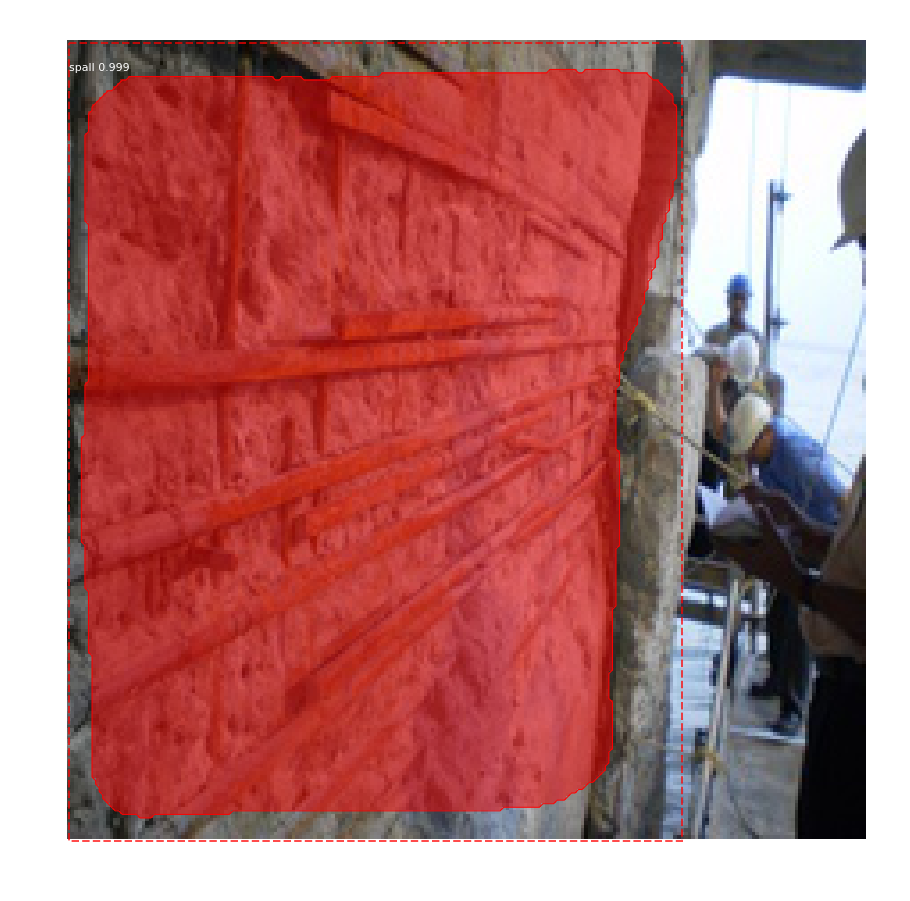

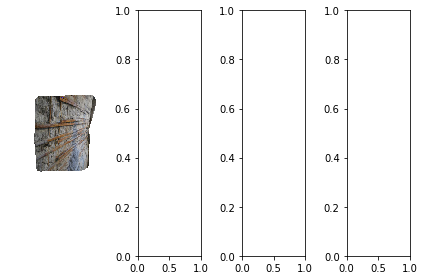

In [ ]:
img_list = ['00008spall_resized.jpg']

import matplotlib.image as mpimg
import cv2

import matplotlib.pyplot as plt
import numpy as np

def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in zip(range(len(figures)), figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.jet())
        #xeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional





def make_segmentation_mask(image, mask,rois):
        img = image.copy()
        print(rois)
        img[:,:,0] *= mask
        img[:,:,1] *= mask
        img[:,:,2] *= mask
        #start y end y start x end x [429 501 642 566]
        img[img[:,:,:]== 0] = 255
        cropped = img[rois[0]:rois[2],rois[1]:rois[3]]
        #mat_plot_lib_figure
       ##plt.show()
        return  cropped
        
        
for img in img_list:

    
    image = mpimg.imread('F:/MASKRCNNMULTICLASS/New folder (3)/'+str(img))
    # Run object detection
    print(len([image]))
    results = model.detect([image], verbose=1)
    print(results)

    # Display results
    ax = get_ax(1)
    print(ax)
    r = results[0]
    image2 = image.copy()
    
    print(image.shape,r['masks'].shape)
    print(r['masks'].shape[-1])
    
    figures ={}
    for i in range(r['masks'].shape[-1]):
        #print(i)
        mask = r['masks'][:,:,i]
        croped_roi_image = make_segmentation_mask(image, mask,r['rois'][i])
        figures[i] = croped_roi_image
    
                

    # plot of the images in a figure, with 5 rows and 4 columns
    plot_figures(figures, 1,4)
    #plt.show()
    
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                ['BG', 'spall', 'crack'], r['scores'], ax=ax,
                                title="")
  

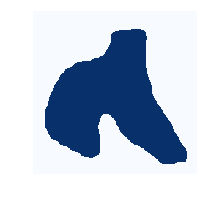

In [ ]:
display_images(np.transpose(r['masks'], [2, 0, 1]), cmap="Blues")

In [25]:
# import matplotlib.image as mpimg
# imagelist=['00001crack_resized.jpg']
# for i in imagelist:
#    # image = mpimg.imread('F:/Mask_RCNN-master/Mask_RCNN-master/samples/catdog/val/'+str(img))
#     image = plt.imread('F:/train/'+i)
#     # Run object detection
#     #print(len([image]))
#     results = model.detect([image], verbose=1)
#     #print(results)
#     # Display results
#     ax = get_ax(1)
#     image_name='sg11'
#     r = results[0]
#     x.save_image(image,image_name, r['rois'], masks=r['masks'],class_ids= r['class_ids'],scores=r['scores'],
#                                 class_names=['BG', 'spall', 'crack'], 
#                                )
    
  
    

In [ ]:
#/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/predicted_image

In [ ]:
#/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train

In [30]:
import os 
import cv2  
from PIL import Image  
  
# Checking the current directory path 
print(os.getcwd())  
  
# Folder which contains all the images 
# from which video is to be generated 
os.chdir("/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/")   
path = "/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/"
  
mean_height = 0
mean_width = 0
  
num_of_images = len(os.listdir('.')) 
# print(num_of_images) 
  
for file in os.listdir('.'): 
    if file.endswith(".jpg"):
       im = Image.open(os.path.join(path, file)) 
       width, height = im.size 
       mean_width += width 
       mean_height += height 
    # im.show()   # uncomment this for displaying the image 
  
# Finding the mean height and width of all images. 
# This is required because the video frame needs 
# to be set with same width and height. Otherwise 
# images not equal to that width height will not get  
# embedded into the video 
mean_width = int(mean_width / num_of_images) 
mean_height = int(mean_height / num_of_images) 
  
# print(mean_height) 
# print(mean_width) 
  
# Resizing of the images to give 
# them same width and height  
for file in os.listdir('.'): 
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"): 
        # opening image using PIL Image 
        im = Image.open(os.path.join(path, file))  
   
        # im.size includes the height and width of image 
        width, height = im.size    
        print(width, height) 
  
        # resizing  
        imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS)  
        imResize.save( file, 'JPEG', quality = 95) # setting quality 
        # printing each resized image name 
        print(im.filename.split('\\')[-1], " is resized")  
  
  
# Video Generating function 
def generate_video(): 
    image_folder = '.' # make sure to use your folder 
    video_name = 'train_vid.avi'
    os.chdir("/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/") 
      
    images = [img for img in os.listdir(image_folder) 
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")] 
     
    # Array images should only consider 
    # the image files ignoring others if any 
    print(images)  
  
    frame = cv2.imread(os.path.join(image_folder, images[0])) 
  
    # setting the frame width, height width 
    # the width, height of first image 
    height, width, layers = frame.shape   
  
    video = cv2.VideoWriter(video_name, 0, 1, (width, height))  
  
    # Appending the images to the video one by one 
    for image in images:  
        video.write(cv2.imread(os.path.join(image_folder, image)))  
      
    # Deallocating memories taken for window creation 
    cv2.destroyAllWindows()  
    video.release()  # releasing the video generated 
  
  
# Calling the generate_video function 
generate_video() 

/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train
213 213
/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/00001crack_resized.jpg  is resized
213 213
/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/00002spall_resized.jpg  is resized
213 213
/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/00001spall_resized.jpg  is resized
213 213
/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/00003crack_resized.jpg  is resized
213 213
/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/00002crack_resized.jpg  is resized
213 213
/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/00005crack_resized.jpg  is resized
213 213
/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/00003spall_resized.jpg  is resized
213 213
/content/drive/My Drive/Mask_RCNN-master/Mask_RCNN-master/dataset/train/00004crack_resized.jpg  is resized
213 213
